In [1]:
import warnings
from pyforest import *
import dask.dataframe as dd
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
food = pd.read_csv('zomato.csv')


<IPython.core.display.Javascript object>

In [3]:
food.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
food.drop(['url', 'dish_liked', 'phone'], axis = 1, inplace = True) 
food.drop_duplicates(inplace = True)

In [6]:
food.isna().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [7]:
food = food.rename(columns={'approx_cost(for two people)': 'cost_for_two', 'listed_in(type)': 'type', 'listed_in(city)':'city'})
food.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [8]:
food.dropna(how = 'any', inplace = True)

In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost_for_two  43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [10]:
food.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
cost_dist = food[[
    'rate', 'cost_for_two', 'online_order','location','name','rest_type']].dropna()
cost_dist['rate'] = cost_dist['rate'].apply(
    lambda x: float(x.split('/')[0]) if len(x) > 3 else 0)
cost_dist['cost_for_two'] = cost_dist['cost_for_two'].apply(
    lambda x: int(x.replace(',', '')))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rating vs Cost')

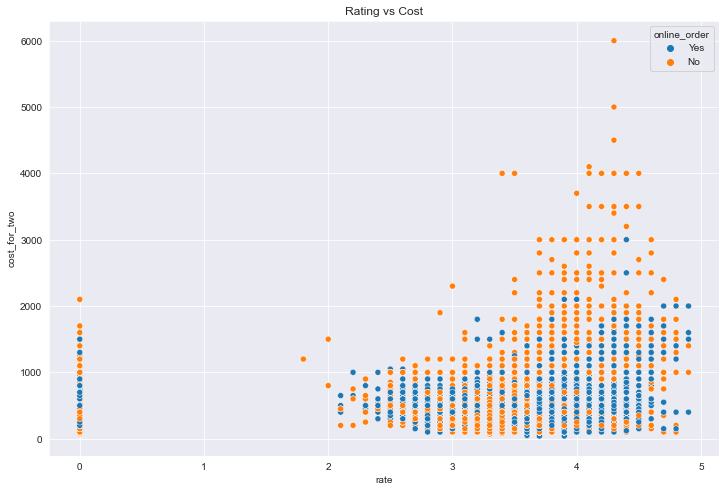

In [12]:
sns.scatterplot(x="rate", y='cost_for_two',
                hue='online_order', data=cost_dist)
plt.title('Rating vs Cost')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x26a8002a6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

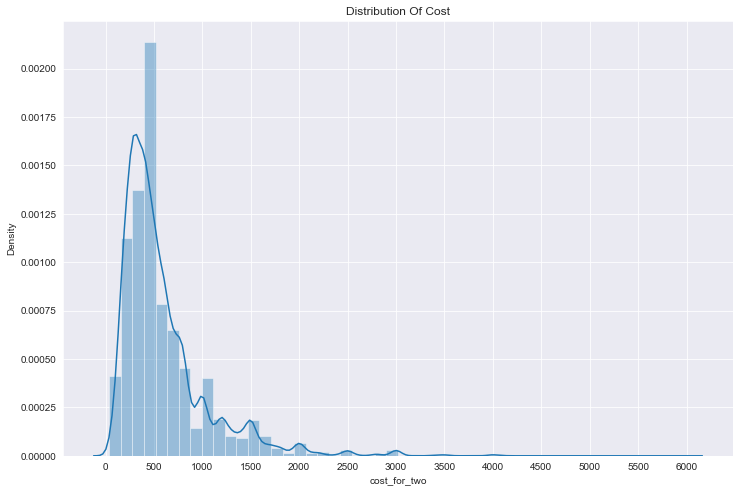

In [13]:
sns.distplot(cost_dist['cost_for_two'])
plt.title('Distribution Of Cost') 
plt.xticks(np.arange(0,6500, 500))

In [14]:
food.cost_for_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [15]:
food['cost_for_two'] = food['cost_for_two'].astype(str)
food['cost_for_two'] = food['cost_for_two'].apply(lambda x: x.replace(',','.'))
food['cost_for_two'] = food['cost_for_two'].astype(float)



In [16]:
food.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
food['rate'] = food['rate'].str.replace('/5', '')
food = food[food['rate'] != 'NEW']
food = food[food['rate'] != '-']
food['rate'] = food['rate'].astype(float)

In [18]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost_for_two  41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.7+ MB


In [19]:
food.online_order.replace(('Yes', 'No'), (True, False), inplace =True)
food.book_table.replace(('Yes', 'No'), (True, False), inplace =True)
food.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x26a815b75e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

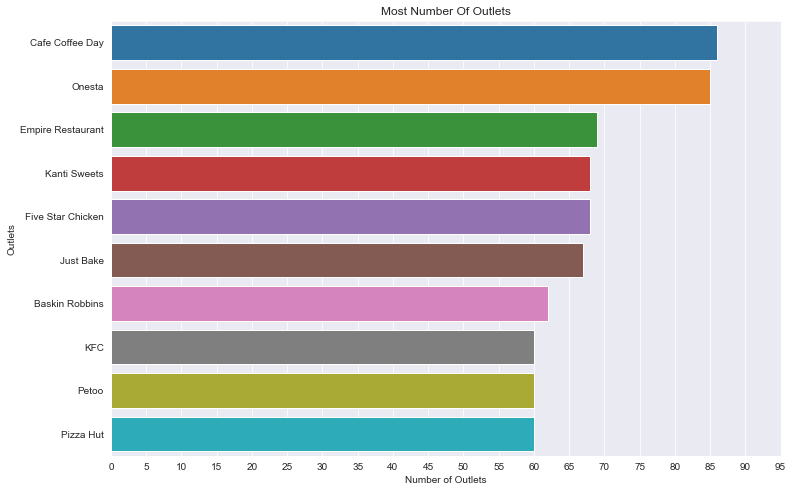

In [20]:
most_outlets = food['name'].value_counts().sort_values(
    ascending=False).reset_index()[:10]
sns.set_style('darkgrid')
sns.barplot(data = most_outlets, x = 'name', y ='index')
plt.title('Most Number Of Outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Outlets')
plt.xticks(np.arange(0,100,5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.YTick at 0x26a81630fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

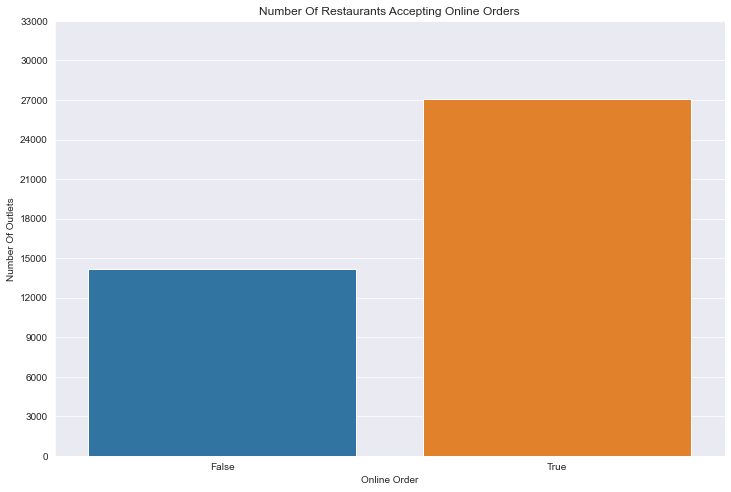

In [21]:
sns.countplot(food['online_order'])
plt.title('Number Of Restaurants Accepting Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Number Of Outlets')
plt.yticks(np.arange(0, 35000, 3000))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.YTick at 0x26aaa1cd820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

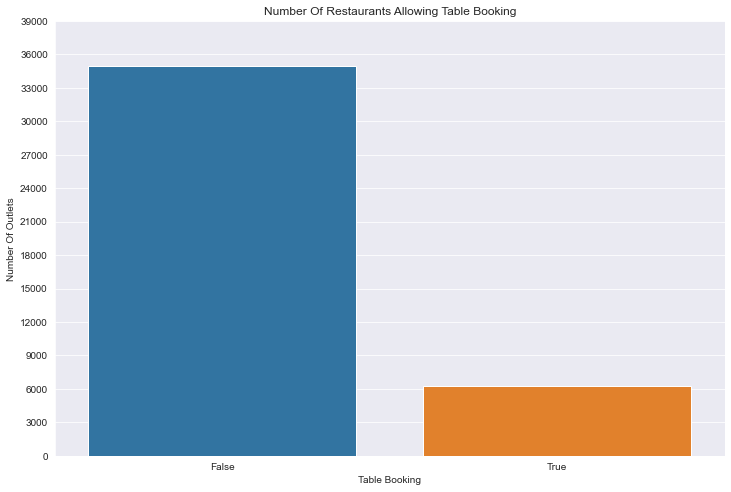

In [22]:
sns.countplot(food['book_table'])
plt.title('Number Of Restaurants Allowing Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Number Of Outlets')
plt.yticks(np.arange(0, 40000, 3000))


In [23]:
food.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='rest_type', ylabel='index'>

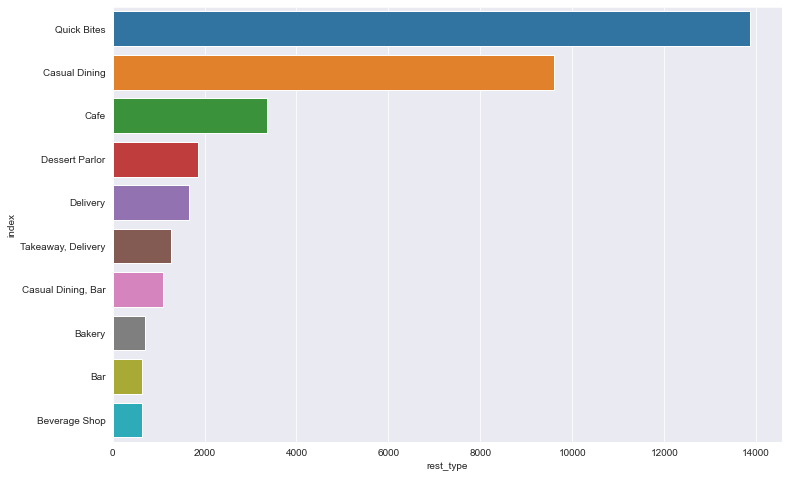

In [24]:
restaurant_cat_count = food['rest_type'].value_counts(
).sort_values(ascending=False).reset_index()[:10]
sns.barplot(data = restaurant_cat_count, y = 'index', x = 'rest_type')
# restaurant_cat_count


<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x26aaa4852b0>,
 [Text(0.0171407535584776, 1.1998775748248016, 'Delivery'),
  Text(-0.6046387589769926, -1.0365384561813238, 'Dine-out'),
  Text(0.8176247310114971, -0.8783449204261256, 'Desserts'),
  Text(1.0532775151080989, -0.5749838920941249, 'Cafes'),
  Text(1.144629359650973, -0.3603104619977107, 'Drinks & nightlife'),
  Text(1.184514791078669, -0.19215803318065314, ' Buffet'),
  Text(1.198609320344464, -0.05775549483280263, 'Pubs and bars')],
 [Text(0.007141980649365667, 0.499948989510334, '50%'),
  Text(-0.2519328162404136, -0.43189102340888497, '34%'),
  Text(0.34067697125479046, -0.36597705017755233, '7%'),
  Text(0.43886563129504125, -0.2395766217058854, '4%'),
  Text(0.47692889985457204, -0.1501293591657128, '3%'),
  Text(0.4935478296161121, -0.08006584715860547, '2%'),
  Text(0.4994205501435267, -0.024064789513667764, '2%')])

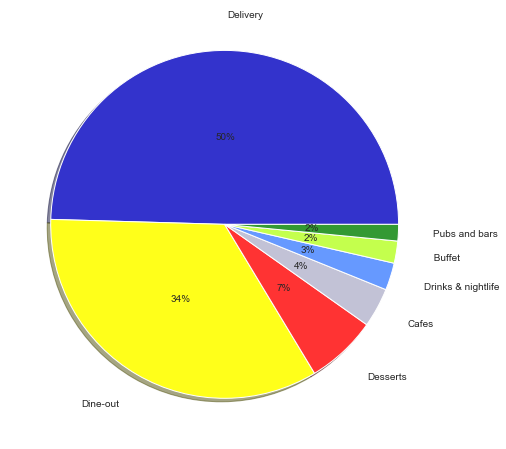

In [25]:
restaurant_type_count = food['type'].value_counts().sort_values(ascending = False)[:7]
slices = restaurant_type_count.values
labels = ['Delivery', 'Dine-out', 'Desserts', 'Cafes','Drinks & nightlife',' Buffet','Pubs and bars']
colors = ['#3333cc', '#ffff1a', '#ff3333',
          '#c2c2d6', '#6699ff', '#c4ff4d', '#339933']
plt.pie(slices, colors=colors, labels=labels, autopct='%1.0f%%',
        pctdistance=.5, labeldistance=1.2, shadow=True)


In [26]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  bool   
 3   book_table    41237 non-null  bool   
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost_for_two  41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 5.2+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution Of Ratings')

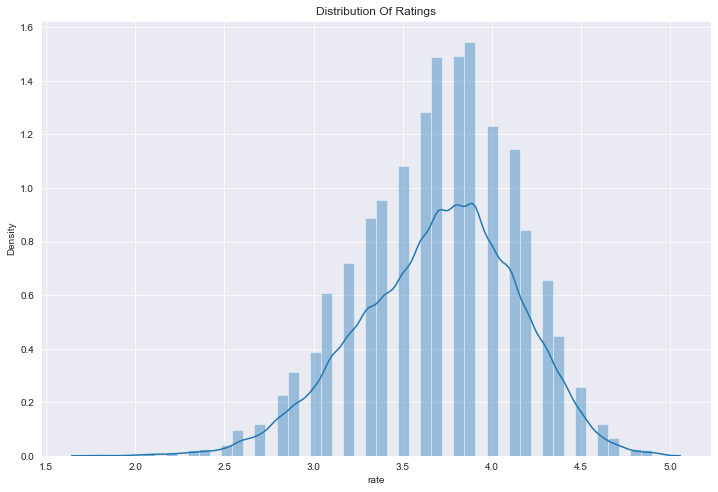

In [27]:
sns.distplot(food['rate'])
plt.title('Distribution Of Ratings')

In [28]:
cost_dist

,rate,cost_for_two,online_order,location,name,rest_type
0,4.1,800,Yes,Banashankari,Jalsa,Casual Dining
1,4.1,800,Yes,Banashankari,Spice Elephant,Casual Dining
2,3.8,800,Yes,Banashankari,San Churro Cafe,"Cafe, Casual Dining"
3,3.7,300,No,Banashankari,Addhuri Udupi Bhojana,Quick Bites
4,3.8,600,No,Basavanagudi,Grand Village,Casual Dining
...,...,...,...,...,...,...
51709,3.7,800,No,Whitefield,The Farm House Bar n Grill,"Casual Dining, Bar"
51711,2.5,800,No,Whitefield,Bhagini,"Casual Dining, Bar"
51712,3.6,1500,No,Whitefield,Best Brews - Four Points by Sheraton Bengaluru...,Bar
51715,4.3,2500,No,"ITPL Main Road, Whitefield",Chime - Sheraton Grand Bengaluru Whitefield Ho...,Bar


In [29]:
def budget_restaurants(location, restaurant_type):
    budget = cost_dist[(cost_dist['cost_for_two']<= 400)& (cost_dist['location'] == location) & (cost_dist['rate']> 4) & (cost_dist['rest_type'] == restaurant_type )]
    return(budget['name'].unique())

In [30]:
budget_restaurants('Whitefield', 'Quick Bites')


array(['Mooch Marod', 'nu.tree'], dtype=object)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='location'>

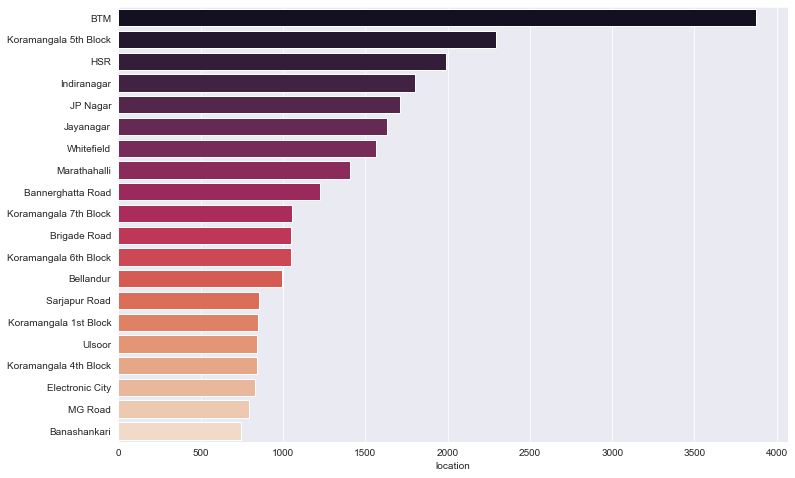

In [31]:
Restaurant_locations=food['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index,palette="rocket")

In [32]:
data = food.copy() 


def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost_for_two', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df


data = Encode(data.copy())
data.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


<IPython.core.display.Javascript object>

<AxesSubplot:>

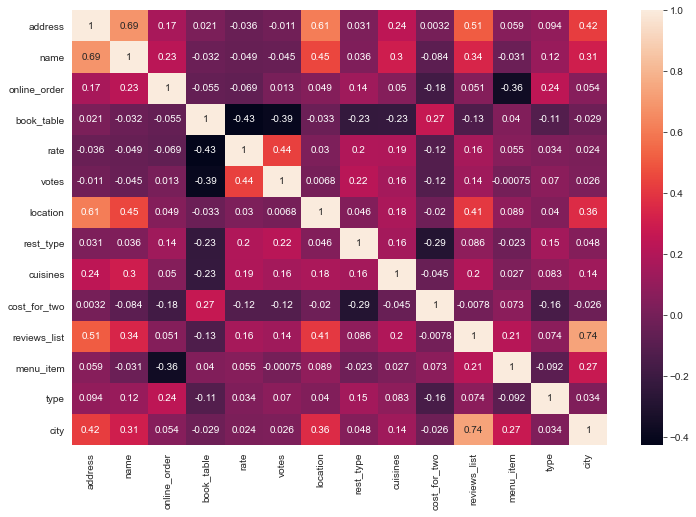

In [33]:
sns.heatmap(data.corr(), annot = True)

In [34]:
data.menu_item.unique()

array([   0,    1,    2, ..., 8240, 8241, 8242], dtype=int64)

In [35]:
X = data.iloc[:,[2,3,5,6,7,8,9,11]]
y = data['rate']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =42, test_size = 0.2)
X_train.head()

<IPython.core.display.Javascript object>

,online_order,book_table,votes,location,rest_type,cuisines,cost_for_two,menu_item
30650,0,1,23,46,0,119,800.0,0
51236,0,1,8,25,21,63,400.0,8145
25446,0,0,360,68,27,1937,1.3,3883
22930,1,1,7,11,2,475,250.0,0
18705,0,0,686,28,0,244,1.0,0


In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32989, 8), (8248, 8), (32989,), (8248,))

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression


models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),    
    'ExtraTreeRegressor': ExtraTreesRegressor(),
    'LinearRegression': LinearRegression()
    
}

results = {}


In [38]:
from sklearn.metrics import r2_score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[model_name] = r2_score(y_test, pred)

results


{'DecisionTreeRegressor': 0.8844249605904833,
 'RandomForestRegressor': 0.9223474908515235,
 'ExtraTreeRegressor': 0.9330338556122575,
 'LinearRegression': 0.2868100711386875}

<IPython.core.display.Javascript object>

<AxesSubplot:>

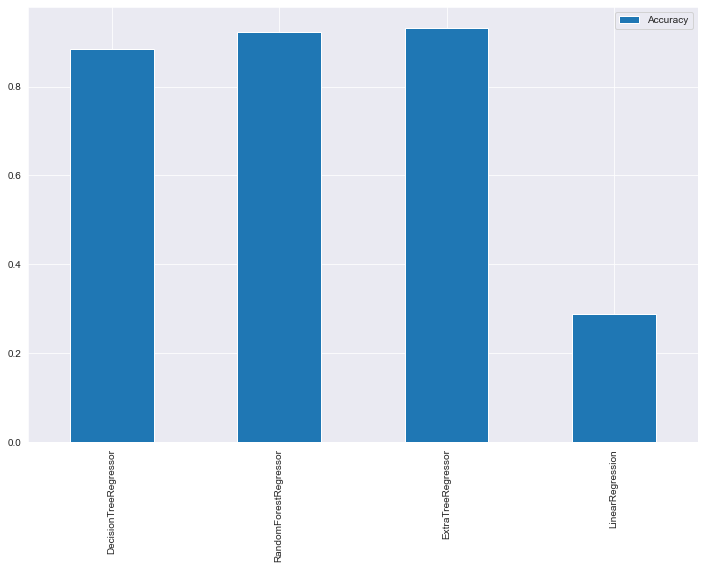

In [39]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["Accuracy"])
results_df.plot.bar()
